# Project name : Prediction for credit card approval


# Submitted by : Yashodharani Arava

# Problem Statement:
* The primary objective of this project is to predict the approval or rejection of credit card applications.
  The challenge lies in understanding the key factors influencing credit card approval decisions and
  building a predictive model to assist in the decision-making process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the train data
train_data=pd.read_csv('train_data.csv')
train_data


,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [3]:
test_data=pd.read_csv('test_data.csv')
test_data

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [4]:
train_data.shape

(29165, 20)

In [5]:
test_data.shape


(7292, 20)

# Basic checks

In [6]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [8]:
train_data.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [9]:
train_data.describe(include =['O'])

,Gender,Has a car,Has a property,Employment status,Education level,Marital status,Dwelling,Job title
count,29165,29165,29165,29165,29165,29165,29165,20138
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,19549,18128,19557,15056,19803,20044,26059,5004


In [10]:
train_data.drop('ID',inplace=True,axis=1)

In [11]:
test_data.drop('ID',inplace=True,axis=1)

In [12]:
train_data.isnull().sum()

Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [13]:
test_data.isnull().sum()

Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [14]:
train_data.drop(columns=('Job title'),inplace=True)

In [15]:
test_data.drop(columns=('Job title'),inplace=True)

In [16]:
train_data.columns

Index(['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length', 'Has a mobile phone', 'Has a work phone',
       'Has a phone', 'Has an email', 'Family member count', 'Account age',
       'Is high risk'],
      dtype='object')

In [17]:
train_data.duplicated().sum()             # To check duplicates

2786

In [18]:
train_data.drop_duplicates(inplace=True)   # We are dropping duplicates,inplace=True means we are making permanent changes

In [19]:
train_data.isnull().sum()

Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26379 entries, 0 to 29164
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               26379 non-null  object 
 1   Has a car            26379 non-null  object 
 2   Has a property       26379 non-null  object 
 3   Children count       26379 non-null  int64  
 4   Income               26379 non-null  float64
 5   Employment status    26379 non-null  object 
 6   Education level      26379 non-null  object 
 7   Marital status       26379 non-null  object 
 8   Dwelling             26379 non-null  object 
 9   Age                  26379 non-null  int64  
 10  Employment length    26379 non-null  int64  
 11  Has a mobile phone   26379 non-null  int64  
 12  Has a work phone     26379 non-null  int64  
 13  Has a phone          26379 non-null  int64  
 14  Has an email         26379 non-null  int64  
 15  Family member count  26379 non-null 

# Domain Analysis

#### The dataset contains the following columns:
* ID : Unique identifier for each record.
* Gender : Gender of the applicant.
* Has a car : Indicates whether the applicant owns a car (binary: 0 or 1).
* Has a property : Indicates whether the applicant owns a property (binary: 0 or 1).
* Children count : Number of children the applicant has.
* Income : Income of the applicant.
* Employment status : Employment status of the applicant.
* Education level : Highest education level attained by the applicant.
* Marital status : Marital status of the applicant.
* Dwelling : Type of dwelling the applicant resides in.
* Age : Age of the applicant.
* Employment length : Duration of the applicant's current employment.
* Has a mobile phone : Indicates whether the applicant has a mobile phone (binary: 0 or 1).
* Has a work phone : Indicates whether the applicant has a work phone (binary: 0 or 1).
* Has a phone : Indicates whether the applicant has any phone (binary: 0 or 1).
* Has an email : Indicates whether the applicant has an email (binary: 0 or 1).
* Job title : Title or position of the applicant's job.
* Family member count : Number of family members.
* Account age : Age of the applicant's account.
* Is high risk (Target Variable): Whether the applicant is considered high risk (0 for no, 1 for yes).

In [21]:
average_income=train_data['Income'].mean()
average_income

185966.69822586147

In [22]:
gender_income=train_data.groupby('Gender')['Income'].mean()
gender_income

Gender
F    171809.632336
M    214769.397791
Name: Income, dtype: float64

# Exploratory Data Analysis

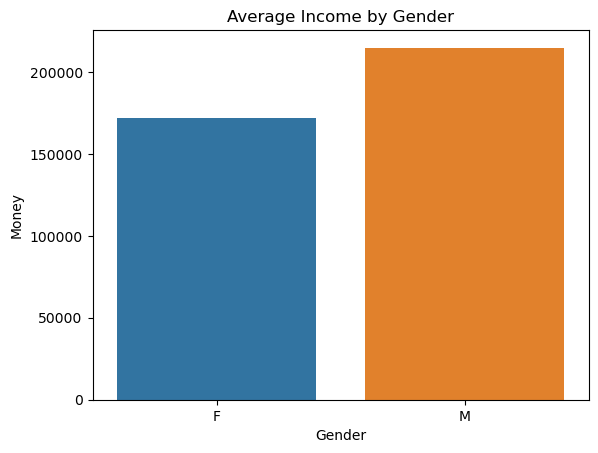

In [23]:
sns.barplot(x=gender_income.index,y=gender_income.values)
plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Money")
plt.show()

In [24]:
Label_counts=train_data["Is high risk"].value_counts()
Label_counts

0    25890
1      489
Name: Is high risk, dtype: int64

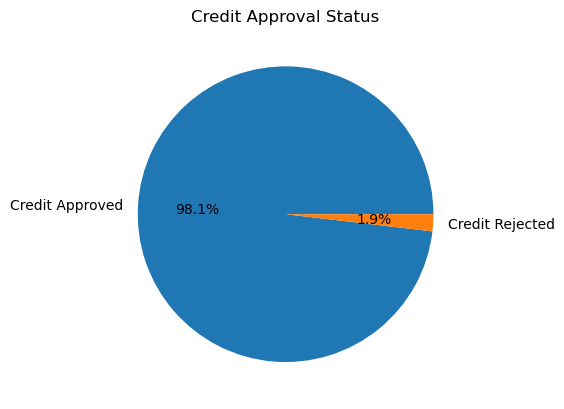

In [25]:
plt.pie(Label_counts, labels=["Credit Approved", "Credit Rejected"], autopct='%1.1f%%')
# If we use this autopct then we can see the percentage points inside the pie chart
plt.title("Credit Approval Status")
plt.show()

In [26]:
train_data.groupby("Employment status")["Income"].mean()

Employment status
Commercial associate    217077.782216
Pensioner               148440.987838
State servant           204460.641431
Student                 151500.000000
Working                 181356.481682
Name: Income, dtype: float64

In [27]:
train_data.groupby("Marital status")["Employment length"].max()

Marital status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employment length, dtype: int64

In [28]:
train_data.groupby("Dwelling")["Family member count"].sum()

Dwelling
Co-op apartment          257.0
House / apartment      51792.0
Municipal apartment     1776.0
Office apartment         453.0
Rented apartment         791.0
With parents            2913.0
Name: Family member count, dtype: float64

In [29]:
train_data.groupby("Gender")["Age"].min()*-1

Gender
F    25140
M    25152
Name: Age, dtype: int64

In [30]:
train_data.groupby("Has a property")["Income"].mean()

Has a property
N    181183.501034
Y    188322.169137
Name: Income, dtype: float64

In [31]:
train_data["Has a mobile phone"].value_counts()

1    26379
Name: Has a mobile phone, dtype: int64

In [32]:
train_data.groupby("Education level")["Has a mobile phone"].max()

Education level
Academic degree                  1
Higher education                 1
Incomplete higher                1
Lower secondary                  1
Secondary / secondary special    1
Name: Has a mobile phone, dtype: int64

In [33]:
train_data.groupby("Children count")["Income"].sum()

Children count
0     3.329384e+09
1     1.057303e+09
2     4.516137e+08
3     5.640210e+07
4     7.519500e+06
5     2.515500e+06
7     3.150000e+05
14    4.500000e+05
19    1.125000e+05
Name: Income, dtype: float64

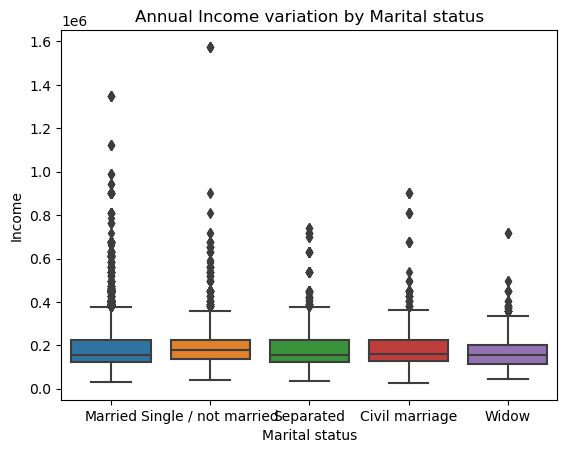

In [34]:
sns.boxplot(x= "Marital status", y="Income", data=train_data)
plt.title("Annual Income variation by Marital status")
plt.show()

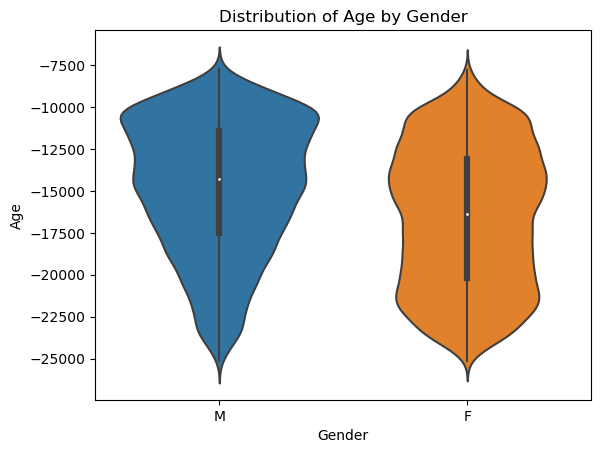

In [35]:
sns.violinplot(x="Gender",y="Age",data=train_data)
plt.title("Distribution of Age by Gender")
plt.show()

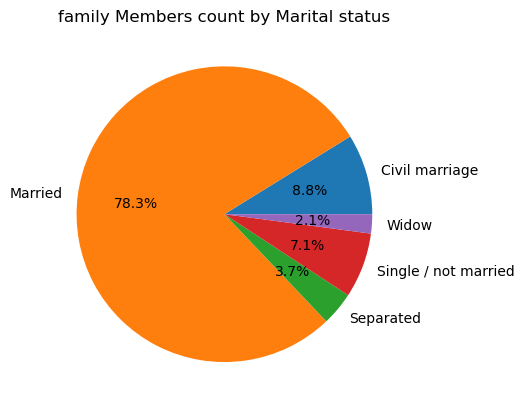

In [36]:
train_data.groupby("Marital status")["Family member count"].sum().plot(kind="pie",autopct='%1.1f%%')
plt.title("family Members count by Marital status")
plt.ylabel("")    # This line we use because we see somw unwanted ylabel title
plt.show()

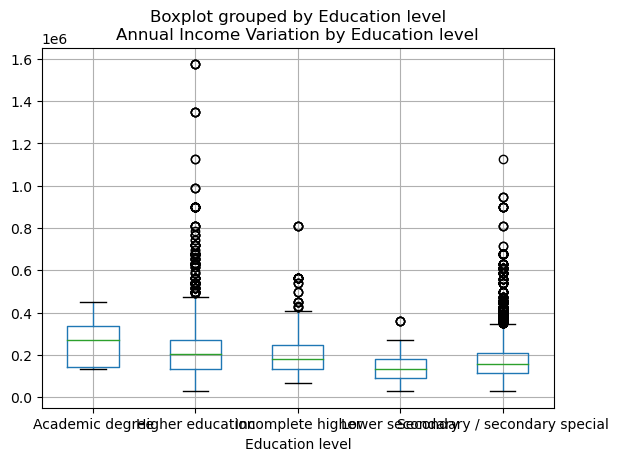

In [37]:
train_data.boxplot(column="Income",by="Education level")
plt.title("Annual Income Variation by Education level")
plt.show()

# Feature Engineering or Data Preprocessing

In [38]:
# Step 1: Handling with Null values and Corrupted data we already did this in previous

In [39]:
# step 2 : Convert categorical data to Numerical data
# For Train_data
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()

In [40]:
train_data["Gender"]=labelencoder.fit_transform(train_data["Gender"])
train_data["Has a car"]=labelencoder.fit_transform(train_data["Has a car"])
train_data["Has a property"]=labelencoder.fit_transform(train_data["Has a property"])
train_data["Employment status"]=labelencoder.fit_transform(train_data["Employment status"])
train_data["Education level"]=labelencoder.fit_transform(train_data["Education level"])
train_data["Marital status"]=labelencoder.fit_transform(train_data["Marital status"])
train_data["Dwelling"]=labelencoder.fit_transform(train_data["Dwelling"])

In [41]:
train_data

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,-16271,-3111,1,0,0,0,2.0,-17.0,0
1,0,1,0,1,135000.0,0,1,3,1,-10130,-1651,1,0,0,0,2.0,-1.0,0
2,0,0,1,2,180000.0,0,4,1,1,-12821,-5657,1,0,0,0,4.0,-38.0,0
3,0,1,1,0,360000.0,0,1,3,1,-20929,-2046,1,0,0,1,1.0,-11.0,0
4,0,0,0,0,270000.0,4,4,2,1,-16207,-515,1,0,1,0,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29159,0,0,1,0,135000.0,0,4,1,1,-11088,-1447,1,0,1,0,2.0,-3.0,0
29161,0,0,1,1,135000.0,0,4,1,1,-15532,-8256,1,0,0,0,3.0,-24.0,0
29162,0,0,1,0,76500.0,4,4,1,1,-17782,-3291,1,1,1,0,2.0,-29.0,0
29163,0,0,1,0,157500.0,1,4,0,1,-21635,365243,1,0,1,0,2.0,-37.0,0


In [42]:
# For test_data

In [43]:
test_data["Gender"]=labelencoder.fit_transform(test_data["Gender"])
test_data["Has a car"]=labelencoder.fit_transform(test_data["Has a car"])
test_data["Has a property"]=labelencoder.fit_transform(test_data["Has a property"])
test_data["Employment status"]=labelencoder.fit_transform(test_data["Employment status"])
test_data["Education level"]=labelencoder.fit_transform(test_data["Education level"])
test_data["Marital status"]=labelencoder.fit_transform(test_data["Marital status"])
test_data["Dwelling"]=labelencoder.fit_transform(test_data["Dwelling"])

In [44]:
test_data

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,0,0,1,0,202500.0,2,4,2,1,-16834,-1692,1,0,0,0,1.0,-6.0,0
1,1,1,0,0,675000.0,0,1,1,1,-18126,-948,1,0,1,0,2.0,-16.0,0
2,0,0,0,0,234000.0,2,1,0,1,-21967,-5215,1,0,0,1,2.0,-52.0,0
3,0,1,1,0,445500.0,0,1,1,1,-12477,-456,1,0,0,0,2.0,-54.0,0
4,0,1,0,0,225000.0,4,4,1,2,-12155,-667,1,0,0,0,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,0,1,1,0,135000.0,4,4,1,1,-21724,-1351,1,0,0,0,2.0,-22.0,0
7288,0,1,1,0,157500.0,4,1,1,1,-14976,-3550,1,0,0,1,2.0,-42.0,0
7289,0,0,1,0,67500.0,4,4,4,1,-20482,-5030,1,1,1,0,1.0,-25.0,0
7290,0,1,0,0,95850.0,0,4,1,1,-18931,-6678,1,1,0,0,2.0,-49.0,0


In [45]:
# Separate features and target variable in the training data
X_train = train_data.drop(columns=['Is high risk'])
y_train = train_data['Is high risk']

# Separate features and target variable in the test data
X_test = test_data.drop(columns=['Is high risk'])
y_test = test_data['Is high risk']

In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Now, both train and test data are scaled appropriately



# Model Creation 

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [48]:
# Prediction using the models
log_predictions = log_model.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix


In [50]:
# Training score

In [51]:
y_train_predict=log_model.predict(X_train_scaled)    # passing x_train to predict y_tain

In [52]:
acc_train=accuracy_score(y_train,y_train_predict)     # Checking accuracy
acc_train

0.9814625270101217

In [53]:
pd.crosstab(y_train,y_train_predict)         # This will show confusion matrix

col_0,0
Is high risk,
0,25890
1,489


In [54]:
print(classification_report(y_train,y_train_predict))     # This will give precision,recall,f1_score

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25890
           1       0.00      0.00      0.00       489

    accuracy                           0.98     26379
   macro avg       0.49      0.50      0.50     26379
weighted avg       0.96      0.98      0.97     26379



In [55]:
# testing score

In [56]:
acc=accuracy_score(y_test,log_predictions)     #accuracy score of logistic regression
acc

0.9839550191991223

In [57]:
print(classification_report(y_test,log_predictions))        #classification report  of logistic regression


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



In [58]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,log_predictions))

Train accuracy : 0.9814625270101217
Test accuracy : 0.9839550191991223


# SVM

In [59]:
from sklearn.svm import SVC                 #importing svc
svclassifier=SVC()                          #base model with default parameters
svclassifier.fit(X_train_scaled,y_train)          

SVC()

In [60]:
y_hat=svclassifier.predict(X_test_scaled)          #predicting x_test data
y_hat 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
y_train_predict=svclassifier.predict(X_train_scaled)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# # Evaluation Metrics for SVM Classifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix


In [63]:
# Training data

In [64]:
acc_train = accuracy_score(y_train,y_train_predict)
acc_train

0.9814625270101217

In [65]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25890
           1       0.00      0.00      0.00       489

    accuracy                           0.98     26379
   macro avg       0.49      0.50      0.50     26379
weighted avg       0.96      0.98      0.97     26379



In [66]:
# Testing data

In [67]:
acc=accuracy_score(y_test,y_hat)                   #accuracy score of svm classifier
acc

0.9839550191991223

In [68]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



In [69]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_hat))

Train accuracy : 0.9814625270101217
Test accuracy : 0.9839550191991223


# Decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier     #importing decision tree classifier
dt=DecisionTreeClassifier()                  #creating an object for decision tree
dt.fit(X_train_scaled,y_train)   

DecisionTreeClassifier()

In [71]:
y_hat1=dt.predict(X_test_scaled)                 #predicting the testing data
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
y_train_predict1=dt.predict(X_train_scaled)
y_train_predict1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Training data

In [74]:
acc_train = accuracy_score(y_train,y_train_predict1)
acc_train

0.998521551233936

In [75]:
print(classification_report(y_train,y_train_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25890
           1       1.00      0.92      0.96       489

    accuracy                           1.00     26379
   macro avg       1.00      0.96      0.98     26379
weighted avg       1.00      1.00      1.00     26379



In [76]:
# testing data

In [77]:
acc_test = accuracy_score(y_test,y_hat1)
acc_test

0.9709270433351618

In [78]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7175
           1       0.16      0.19      0.17       117

    accuracy                           0.97      7292
   macro avg       0.57      0.59      0.58      7292
weighted avg       0.97      0.97      0.97      7292



In [79]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict1))
print("Test accuracy :",accuracy_score(y_test,y_hat1))

Train accuracy : 0.998521551233936
Test accuracy : 0.9709270433351618


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier      # Importing random forest classifier
rf_clf=RandomForestClassifier(n_estimators=100)          # Creating a object for random forest classifier
rf_clf.fit(X_train_scaled,y_train) 

RandomForestClassifier()

In [81]:
y_train_predict2=rf_clf.predict(X_train_scaled)
y_train_predict2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
y_predict=rf_clf.predict(X_test_scaled)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
# Training data

In [84]:
acc_train2=accuracy_score(y_train,y_train_predict2)
acc_train2

0.998521551233936

In [85]:
print(classification_report(y_train,y_train_predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25890
           1       1.00      0.92      0.96       489

    accuracy                           1.00     26379
   macro avg       1.00      0.96      0.98     26379
weighted avg       1.00      1.00      1.00     26379



In [86]:
# Testing data

In [87]:
acc_test2 = accuracy_score(y_test,y_predict)
acc_test2

0.9821722435545803

In [88]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.35      0.13      0.19       117

    accuracy                           0.98      7292
   macro avg       0.67      0.56      0.59      7292
weighted avg       0.98      0.98      0.98      7292



In [89]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict2))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.998521551233936
Test accuracy : 0.9821722435545803


# GB Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier            # Importing GB cassifier
gbm=GradientBoostingClassifier()                                   # Object creation for GB Classifier
gbm.fit(X_train_scaled,y_train) 

GradientBoostingClassifier()

In [91]:
y_gbm=gbm.predict(X_test_scaled)
y_gbm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
y_gbm_train=gbm.predict(X_train_scaled)
y_gbm_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
acc_train3=accuracy_score(y_train,y_gbm_train)
acc_train3

0.9828651578907465

In [94]:
print(classification_report(y_train,y_gbm_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25890
           1       0.93      0.08      0.15       489

    accuracy                           0.98     26379
   macro avg       0.96      0.54      0.57     26379
weighted avg       0.98      0.98      0.98     26379



In [95]:
# Testing data

In [96]:
acc_test3=accuracy_score(y_test,y_gbm)
acc_test3

0.9836807460230389

In [97]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.40      0.03      0.06       117

    accuracy                           0.98      7292
   macro avg       0.69      0.52      0.53      7292
weighted avg       0.98      0.98      0.98      7292



In [98]:
# Evaluating the model created 
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy:",accuracy_score(y_train,y_gbm_train))
print("Test accuracy:", accuracy_score(y_test,y_gbm))

Train accuracy: 0.9828651578907465
Test accuracy: 0.9836807460230389


# XGB Classifier

In [100]:
from xgboost import XGBClassifier           # Importing XGBClasiifier
xgb_c=XGBClassifier()                       # object creation for XGBClassifier
xgb_c.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [101]:
y_xgb_train=xgb_c.predict(X_train_scaled)
y_xgb_train

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
y_xgb=xgb_c.predict(X_test_scaled)
y_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
# Training score

In [104]:
acc_xgb_train=accuracy_score(y_train,y_xgb_train)
acc_xgb_train

0.987679593616134

In [105]:
print(classification_report(y_train,y_xgb_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25890
           1       0.97      0.35      0.51       489

    accuracy                           0.99     26379
   macro avg       0.98      0.67      0.75     26379
weighted avg       0.99      0.99      0.98     26379



In [106]:
#Testing score

In [107]:
acc_xgb=accuracy_score(y_test,y_xgb)
acc_xgb

0.9847778387273725

In [108]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.64      0.12      0.20       117

    accuracy                           0.98      7292
   macro avg       0.81      0.56      0.60      7292
weighted avg       0.98      0.98      0.98      7292



In [ ]:
# evaluation metrics
print("Train accuracy:",accuracy_score(y_train,y_xgb_train))
print("Test accuracy:",accuracy_score(y_test,y_xgb))

# Results

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()

In [ ]:
x.fields_names = ["Model","accuracy_score"]

In [ ]:
x.add_row(["Logistic Regression","98%"])
x.add_row(["SVM Classifier","98%"])
x.add_row(["Decision Tree","97%"])
x.add_row(["Random Forest Classifier","98%"])
x.add_row(["GB Classifier","98%"])
x.add_row(["XGB Classifier","98%"])

In [ ]:
print(x)

# Conclusion

* Here, we can see that all algorithms have good accuracy